In [456]:
import pandas as pd

In [457]:
df = pd.read_csv("../out.csv")

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

In [459]:
stats = list(df.columns)[2:]

In [460]:
sns.set(rc={'figure.facecolor':'white'})
plt.rcParams['savefig.dpi'] = 300

In [461]:
df = df[~((df["model"]=="SGD1")|(df["model"]=="SGD2")|(df["model"]=="SGD3"))]

In [462]:
# df = df[(df["elapsed"])]

In [463]:
# df = df[(df["mse"]<12552.223633)]

In [464]:
# df[(df["model"]=="linstorch")&(df["mse"]>0)].max()

In [465]:
df[(df["model"]=="linstorch")]["elapsed"].mean()

nan

In [466]:
df[(df["model"]=="Adagrad3")]["elapsed"].mean()

0.03375117778778071

In [467]:
df[(df["model"]=="Adagrad5")]["elapsed"].mean()

0.05601286649703975

In [468]:
df[(df["model"]=="Adagrad7")]["mse"].mean()

0.4456847311999999

In [469]:
df[(df["model"]=="linstorch")]["mse"].mean()

nan

In [470]:
list(df["model"].unique())

['linear_regression',
 'linstorch(1.0)',
 'linstorch(0.9631578947368421)',
 'linstorch(0.9263157894736842)',
 'linstorch(0.8894736842105263)',
 'linstorch(0.8526315789473684)',
 'linstorch(0.8157894736842105)',
 'linstorch(0.7789473684210526)',
 'linstorch(0.7421052631578948)',
 'linstorch(0.7052631578947368)',
 'linstorch(0.668421052631579)',
 'linstorch(0.631578947368421)',
 'linstorch(0.5947368421052632)',
 'linstorch(0.5578947368421053)',
 'linstorch(0.5210526315789474)',
 'linstorch(0.48421052631578954)',
 'linstorch(0.44736842105263164)',
 'linstorch(0.41052631578947374)',
 'linstorch(0.37368421052631584)',
 'linstorch(0.33684210526315794)',
 'linstorch(0.3)',
 'RANDOM(1.0)',
 'RANDOM(0.9710526315789474)',
 'RANDOM(0.9421052631578948)',
 'RANDOM(0.9131578947368421)',
 'RANDOM(0.8842105263157894)',
 'RANDOM(0.8552631578947368)',
 'RANDOM(0.8263157894736842)',
 'RANDOM(0.7973684210526315)',
 'RANDOM(0.7684210526315789)',
 'RANDOM(0.7394736842105263)',
 'RANDOM(0.7105263157894737)',

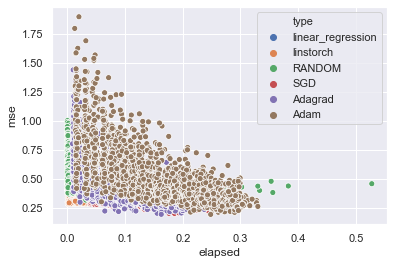

In [471]:
sns.scatterplot(x="elapsed", y="mse", hue='type', data=df)
plt.show()

In [472]:
df.groupby("model")["mse"].mean().head(100)

model
Adagrad1                         0.732845
Adagrad10                        0.382352
Adagrad11                        0.376436
Adagrad12                        0.362836
Adagrad13                        0.363959
                                   ...   
linstorch(0.8526315789473684)    0.383652
linstorch(0.8894736842105263)    0.392181
linstorch(0.9263157894736842)    0.391039
linstorch(0.9631578947368421)    0.390974
linstorch(1.0)                   0.393719
Name: mse, Length: 95, dtype: float64

In [473]:
df.groupby("model")["type"].head()

0       linear_regression
1               linstorch
2               linstorch
3               linstorch
4               linstorch
              ...        
9601                 Adam
9602                 Adam
9603                 Adam
9604                 Adam
9605                 Adam
Name: type, Length: 471, dtype: object

In [474]:
len(df.groupby("model")["mse"].mean())

95

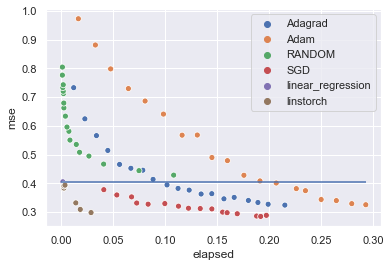

In [475]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.hlines(df[df["model"]=="linear_regression"]["mse"], 0, df.groupby("model")["elapsed"].mean().max())

plt.show()

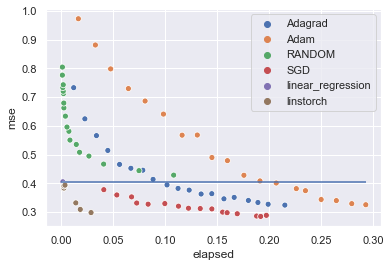

In [476]:
sns.scatterplot(x=df.groupby("model")["elapsed"].mean(), y=df.groupby("model")["mse"].mean(), hue=list(map(lambda x: x[0], df.groupby("model")["type"].unique().values)))
plt.hlines(df[df["model"]=="linear_regression"]["mse"], 0, df.groupby("model")["elapsed"].mean().max())

plt.savefig("outm/elapsed_mse_scatter.png")

In [477]:
df.groupby("model")[["elapsed","mse"]].mean().head(100)

,elapsed,mse
model,,
Adagrad1,0.011819,0.732845
Adagrad10,0.112373,0.382352
Adagrad11,0.123098,0.376436
Adagrad12,0.134590,0.362836
Adagrad13,0.144881,0.363959
...,...,...
linstorch(0.8526315789473684),0.002402,0.383652
linstorch(0.8894736842105263),0.002193,0.392181
linstorch(0.9263157894736842),0.002809,0.391039


In [478]:
# sns.scatterplot(x=df[(df["model"]=="Adagrad3")]["elapsed"], y=df[(df["model"]=="Adagrad3")]["mse"])
# sns.scatterplot(x=df[(df["model"]=="linstorch")]["elapsed"], y=df[(df["model"]=="linstorch")]["mse"])
# plt.show()

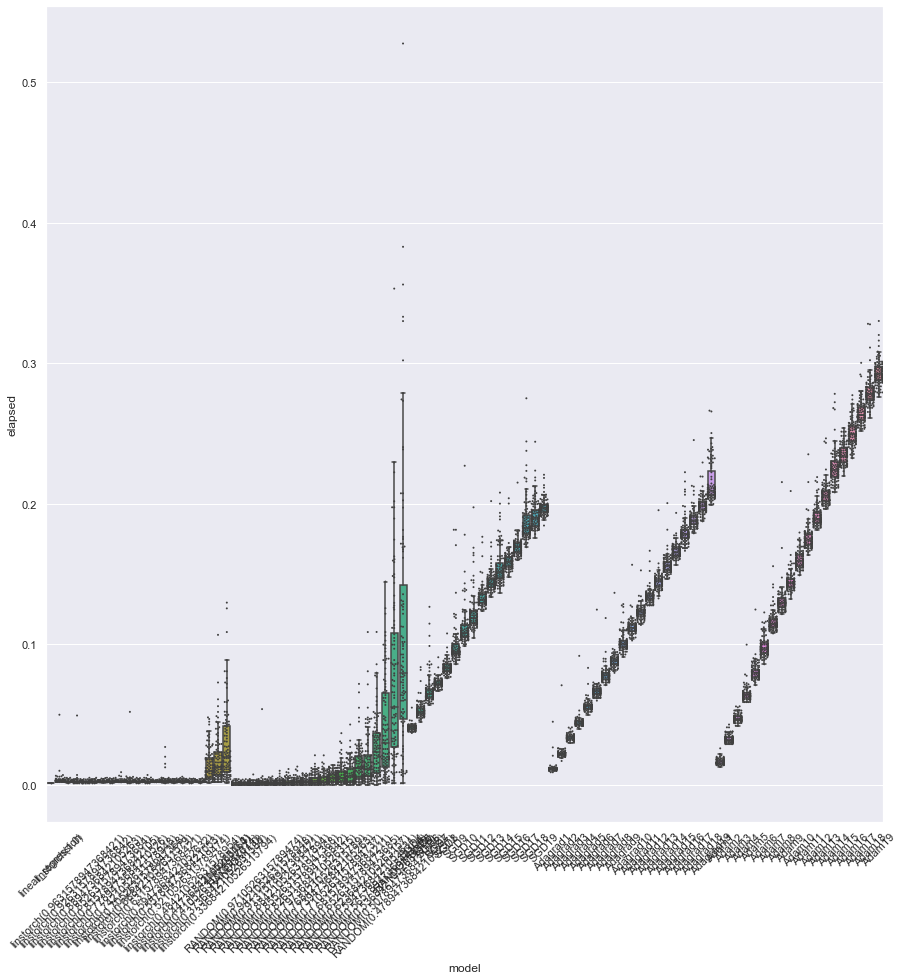

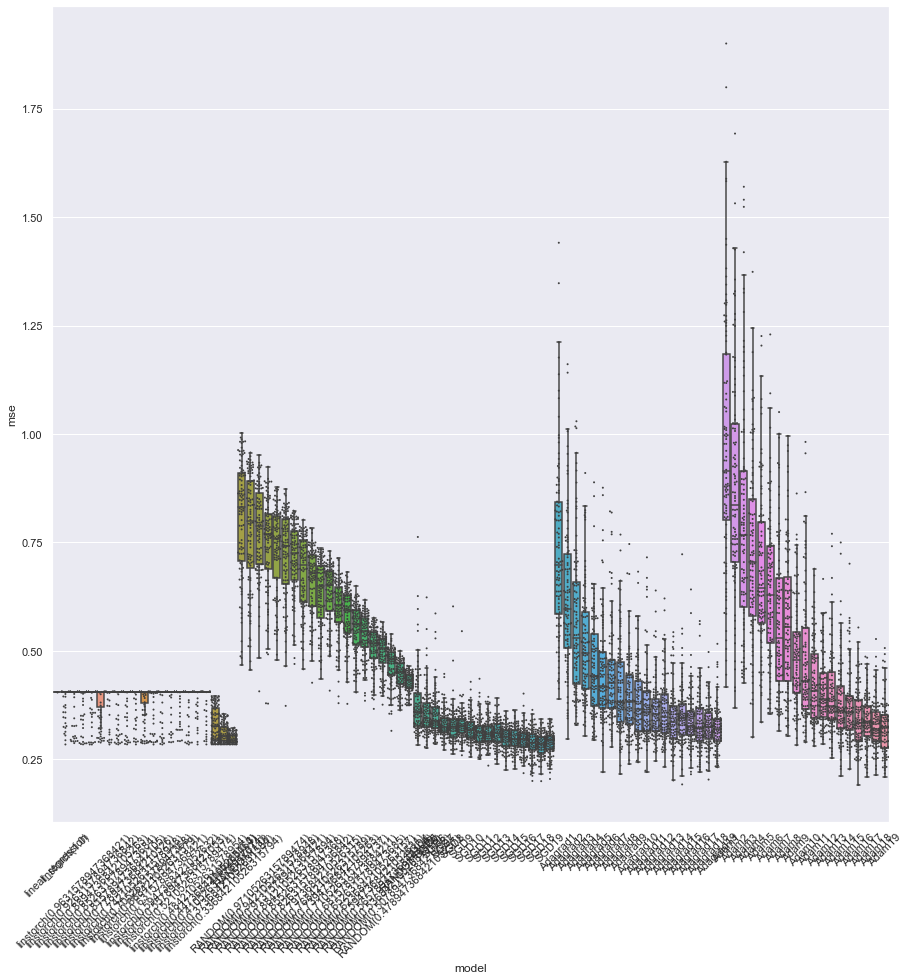

In [479]:
for stat in stats:
    if stat == "type": continue
    plt.subplots(figsize=(15,15))
    # ax = sns.violinplot(x="model", y=stat, data=df)
    # fig = ax.get_figure()
    # fig.savefig("out/" + stat + '_swarm.png')
    ax = sns.boxplot(x="model", y=stat, data=df, showfliers=False)
    ax = sns.swarmplot(x="model", y=stat, data=df, color=".25", s = 2)
    # if stat=="mse": plt.hlines(0.8453290438010049, 0, 100)
    plt.xticks(rotation=45)
    plt.savefig("outm/" + stat + '_swarm.png')

In [480]:
df.groupby("model")["mse"].std()

model
Adagrad1                         0.203208
Adagrad10                        0.086462
Adagrad11                        0.089050
Adagrad12                        0.068742
Adagrad13                        0.073822
                                   ...   
linstorch(0.8526315789473684)    0.038786
linstorch(0.8894736842105263)    0.032475
linstorch(0.9263157894736842)    0.034255
linstorch(0.9631578947368421)    0.035386
linstorch(1.0)                   0.028578
Name: mse, Length: 95, dtype: float64